In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print ('Number of classes: %d' %len(np.unique(iris_y)))
print ('Number of data points: %d' %len(iris_y))


X0 = iris_X[iris_y == 0,:]
print ('\nSamples from class 0:\n', X0[:5,:])

X1 = iris_X[iris_y == 1,:]
print ('\nSamples from class 1:\n', X1[:5,:])

X2 = iris_X[iris_y == 2,:]
print ('\nSamples from class 2:\n', X2[:5,:])

Number of classes: 3
Number of data points: 150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=0.3)


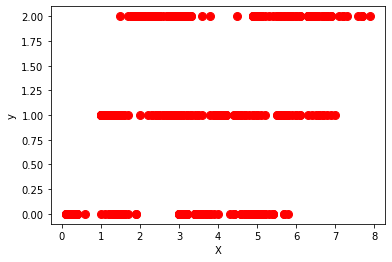

In [4]:
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X_train, y_train, 'ro', markersize=8)

In [5]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Print results for test data points:")
print ("Predicted labels: ", y_pred)
print ("Ground truth    : ", y_test)

Print results for test data points:
Predicted labels:  [2 1 2 1 1 1 0 1 2 0 0 0 2 2 0 0 1 0 2 2 0 1 2 0 2 2 2 2 0 1 0 2 2 0 1 0 0
 1 2 1 1 2 0 2 2]
Ground truth    :  [2 1 2 1 1 1 0 1 2 0 0 0 2 2 0 0 1 0 1 1 0 1 2 0 2 2 2 1 0 1 0 2 2 0 1 0 0
 1 2 1 1 2 0 2 2]


In [6]:
d = {'Actual': y_test, 'Predict': y_pred}
df = pd.DataFrame(data=d)
df

,Actual,Predict
0,2,2
1,1,1
2,2,2
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,2,2
9,0,0


In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy of KNN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of KNN: 93.33 %


In [8]:
accuracy_score(y_test, y_pred)

0.9333333333333333

#### Improve
Nếu tăng số lân cận thì kết quả sẽ chính xác hơn

In [9]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred2)))

Accuracy of 10NN with major voting: 95.56 %


Đánh trọng số cho các điểm lân cận => Kết quả chính xác hơn

In [10]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN (1/distance weights): 93.33 %


#### Test MNIST dataset

In [11]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
         X, y, test_size=0.2, random_state=0)

In [15]:
import time
start_time = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
end_time = time.time()
print ("Accuracy of 1NN for MNIST: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print ("Running time: %.2f (s)" % (end_time - start_time))

Accuracy of 1NN for MNIST: 97.04 %
Running time: 21.70 (s)
